In [68]:
import numpy as np 
import pandas as pd

In [69]:
df=pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [70]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [71]:
df.shape,df.dtypes,df.index

((150, 5),
 sepal.length    float64
 sepal.width     float64
 petal.length    float64
 petal.width     float64
 variety          object
 dtype: object,
 RangeIndex(start=0, stop=150, step=1))

In [72]:
ndf=df.select_dtypes(include=[np.number,np.float64])

In [73]:
nr=pd.Series([5.1,3.5,1.4,0.2,'Setosa'],index=df.columns)


In [74]:
df=pd.concat([df,nr.to_frame().T],ignore_index=True)

In [75]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica
150,5.1,3.5,1.4,0.2,Setosa


In [76]:
df.drop(['variety'],axis=1)


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [77]:
df.rename(columns={'petal.length':'pl'})
df.rename(index={2:8})

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
8,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [78]:
rank=df['petal.length'].rank()

In [79]:
sdf=df.sort_values(by='petal.length',ascending=False)

In [80]:
sdf

,sepal.length,sepal.width,petal.length,petal.width,variety
118,7.7,2.6,6.9,2.3,Virginica
117,7.7,3.8,6.7,2.2,Virginica
122,7.7,2.8,6.7,2.0,Virginica
105,7.6,3.0,6.6,2.1,Virginica
131,7.9,3.8,6.4,2.0,Virginica
...,...,...,...,...,...
2,4.7,3.2,1.3,0.2,Setosa
35,5.0,3.2,1.2,0.2,Setosa
14,5.8,4.0,1.2,0.2,Setosa
13,4.3,3.0,1.1,0.1,Setosa


In [81]:
#sdf=sdf.loc[0,'sepal.length']=np.nan

In [87]:
sdf=pd.DataFrame(sdf)

In [91]:
n1=sdf.copy()
n2=sdf.copy()
n3=sdf.copy()

In [94]:
n1.loc[118,'sepal.length'] = np.nan

In [97]:
n1.fillna(df['sepal.length'].mean())
n1.fillna(45)

,sepal.length,sepal.width,petal.length,petal.width,variety
118,45.0,2.6,6.9,2.3,Virginica
117,7.7,3.8,6.7,2.2,Virginica
122,7.7,2.8,6.7,2.0,Virginica
105,7.6,3.0,6.6,2.1,Virginica
131,7.9,3.8,6.4,2.0,Virginica
...,...,...,...,...,...
2,4.7,3.2,1.3,0.2,Setosa
35,5.0,3.2,1.2,0.2,Setosa
14,5.8,4.0,1.2,0.2,Setosa
13,4.3,3.0,1.1,0.1,Setosa


In [98]:
merge=pd.merge(df,sdf,how='inner',on='sepal.length')

In [99]:
merge.shape

(919, 9)

In [100]:
np.random.seed(42)

In [118]:
x=np.random.rand(100)
y_pos=x+0.2*np.random.randn(100)
y_nn=-x+.2*np.random.randn(100)
y_zz=0.2*np.random.randn(100)

In [104]:
import matplotlib.pyplot as plt 
import seaborn as ans 


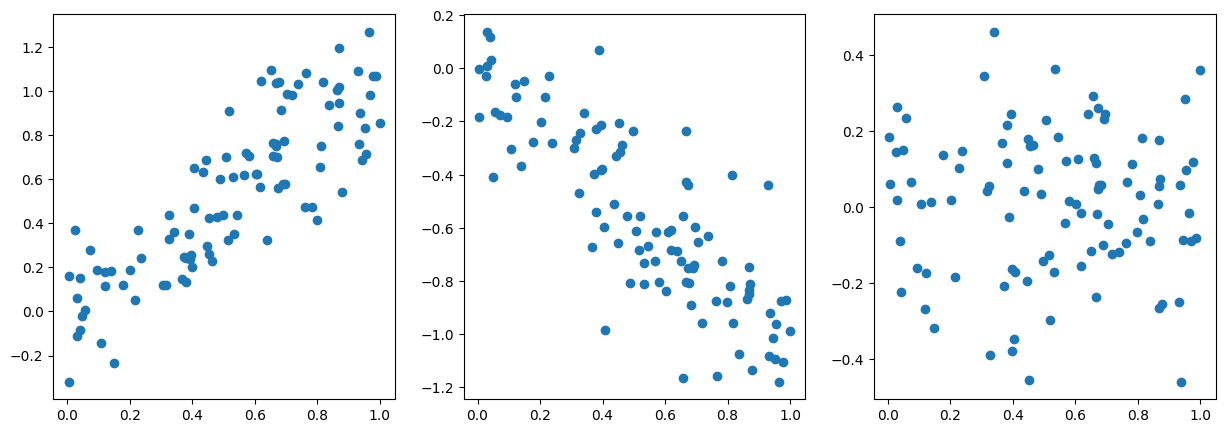

In [120]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
ax[0].scatter(x,y_pos)
ax[1].scatter(x,y_nn)
ax[2].scatter(x,y_zz)

In [121]:
df=ans.load_dataset('tips')

In [122]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


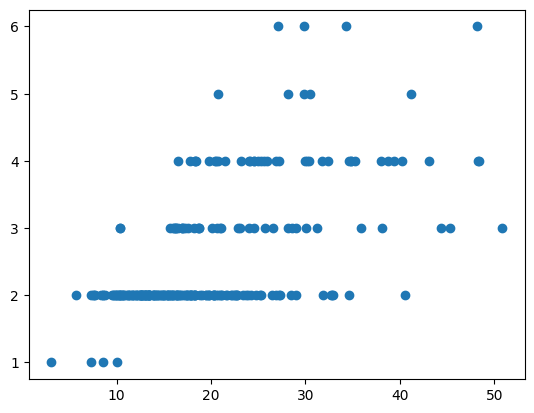

In [124]:
plt.scatter(df['total_bill'],df['size'])

In [129]:
ndf=df.select_dtypes(include=[np.number,np.float64])

In [130]:
cor=ndf.corr()
cor

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

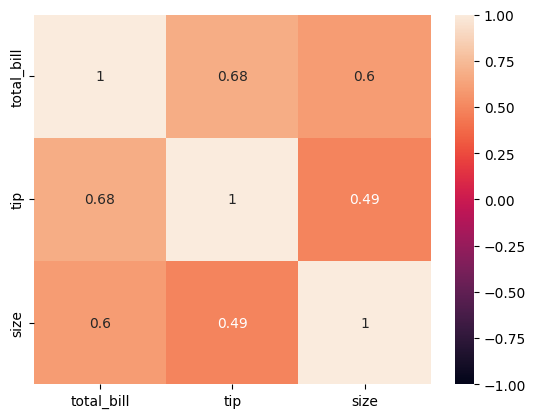

In [131]:
ans.heatmap(cor,vmax=1,vmin=-1,annot=True)

In [137]:
df=pd.read_csv('prices.csv')

In [138]:
df.head()

,Company,Model,Price
0,Samsung,S10,899
1,Samsung,S20,999
2,Samsung,Note20,1199
3,Apple,iPhoneX,415
4,Apple,iPhone11,699


In [139]:
df.columns

Index(['Company', 'Model', 'Price'], dtype='object')

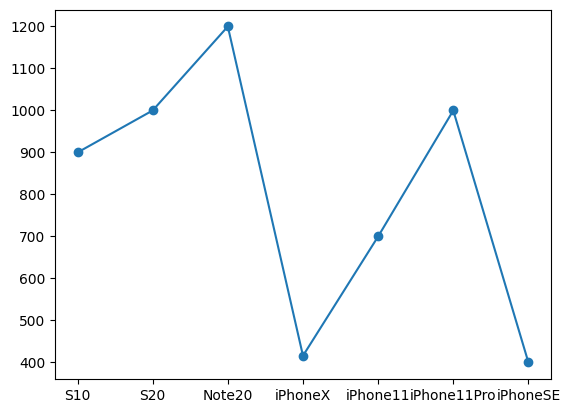

In [143]:
plt.plot(df['Model'],df['Price'],marker='o')

<BarContainer object of 7 artists>

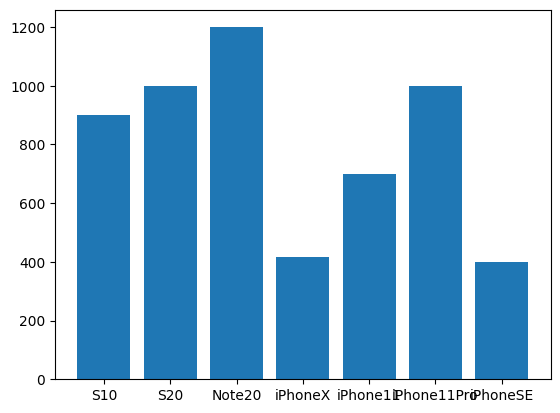

In [146]:
plt.bar(df['Model'],df['Price'])

([<matplotlib.patches.Wedge at 0x2923677acd0>,
 [Text(0.9634739490935357, 0.5307710894708823, 'S10'),
  Text(0.004620761796214298, 1.0999902947573779, 'S20'),
  Text(-1.035591425771137, 0.3708778759501621, 'Note20'),
  Text(-0.9319230067187676, -0.5843967056274805, 'iPhoneX'),
  Text(-0.4148964199068773, -1.0187546126268368, 'iPhone11'),
  Text(0.5883063368166197, -0.9294598722168754, 'iPhone11Pro'),
  Text(1.07264551242132, -0.24378598130820447, 'iPhoneSE')],
 [Text(0.5255312449601103, 0.2895115033477539, '16.0%'),
  Text(0.0025204155252077985, 0.5999947062312969, '17.8%'),
  Text(-0.5648680504206202, 0.20229702324554294, '21.4%'),
  Text(-0.5083216400284186, -0.3187618394331711, '7.4%'),
  Text(-0.22630713813102393, -0.5556843341600928, '12.5%'),
  Text(0.320894365536338, -0.5069781121182956, '17.8%'),
  Text(0.5850793704116289, -0.13297417162265696, '7.1%')])

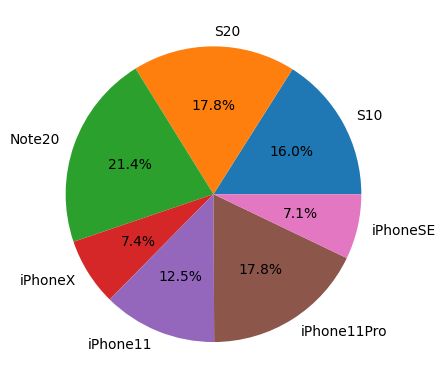

In [154]:
plt.pie(df['Price'],labels=df['Model'],autopct='%1.1f%%')

In [155]:
df=pd.read_csv('mtcars.csv')

In [156]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='cyl', ylabel='mpg'>

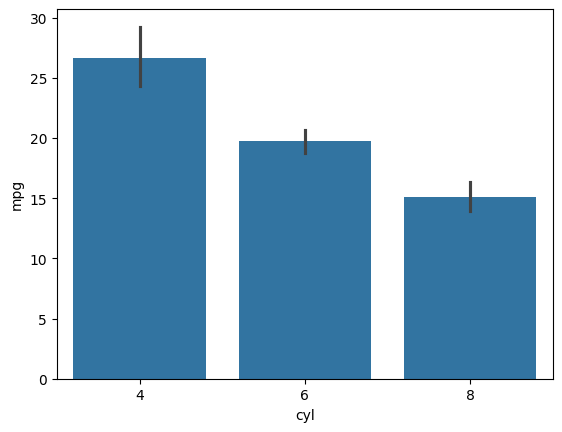

In [159]:
ans.barplot(x='cyl',y='mpg',data=df)

<Axes: xlabel='cyl', ylabel='count'>

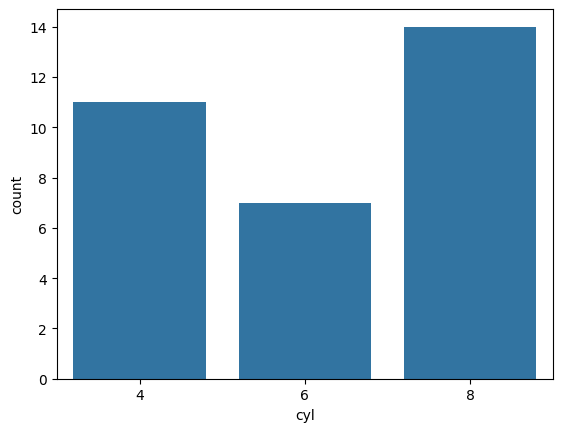

In [160]:
ans.countplot(x='cyl',data=df)

<Axes: xlabel='gear', ylabel='count'>

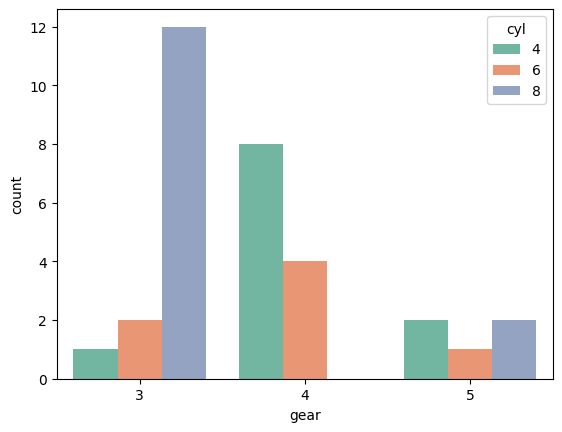

In [164]:
ans.countplot(x='gear',data=df,hue='cyl',palette='Set2')

C:\Users\karthik cse\AppData\Local\Temp\ipykernel_40764\1937484861.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ans.distplot(df['mpg'],kde=True)


<Axes: xlabel='mpg', ylabel='Density'>

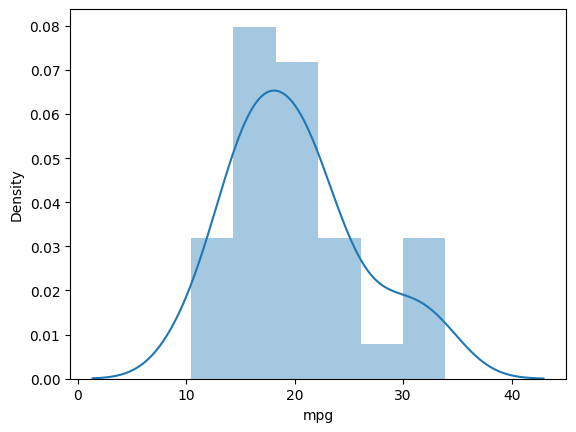

In [166]:
ans.distplot(df['mpg'],kde=True)

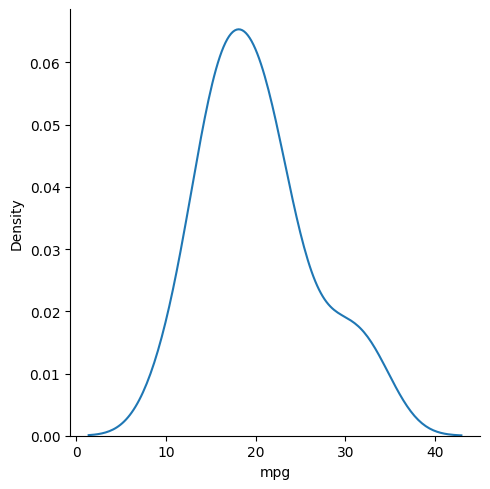

In [169]:
ans.displot(df['mpg'],kind='kde')


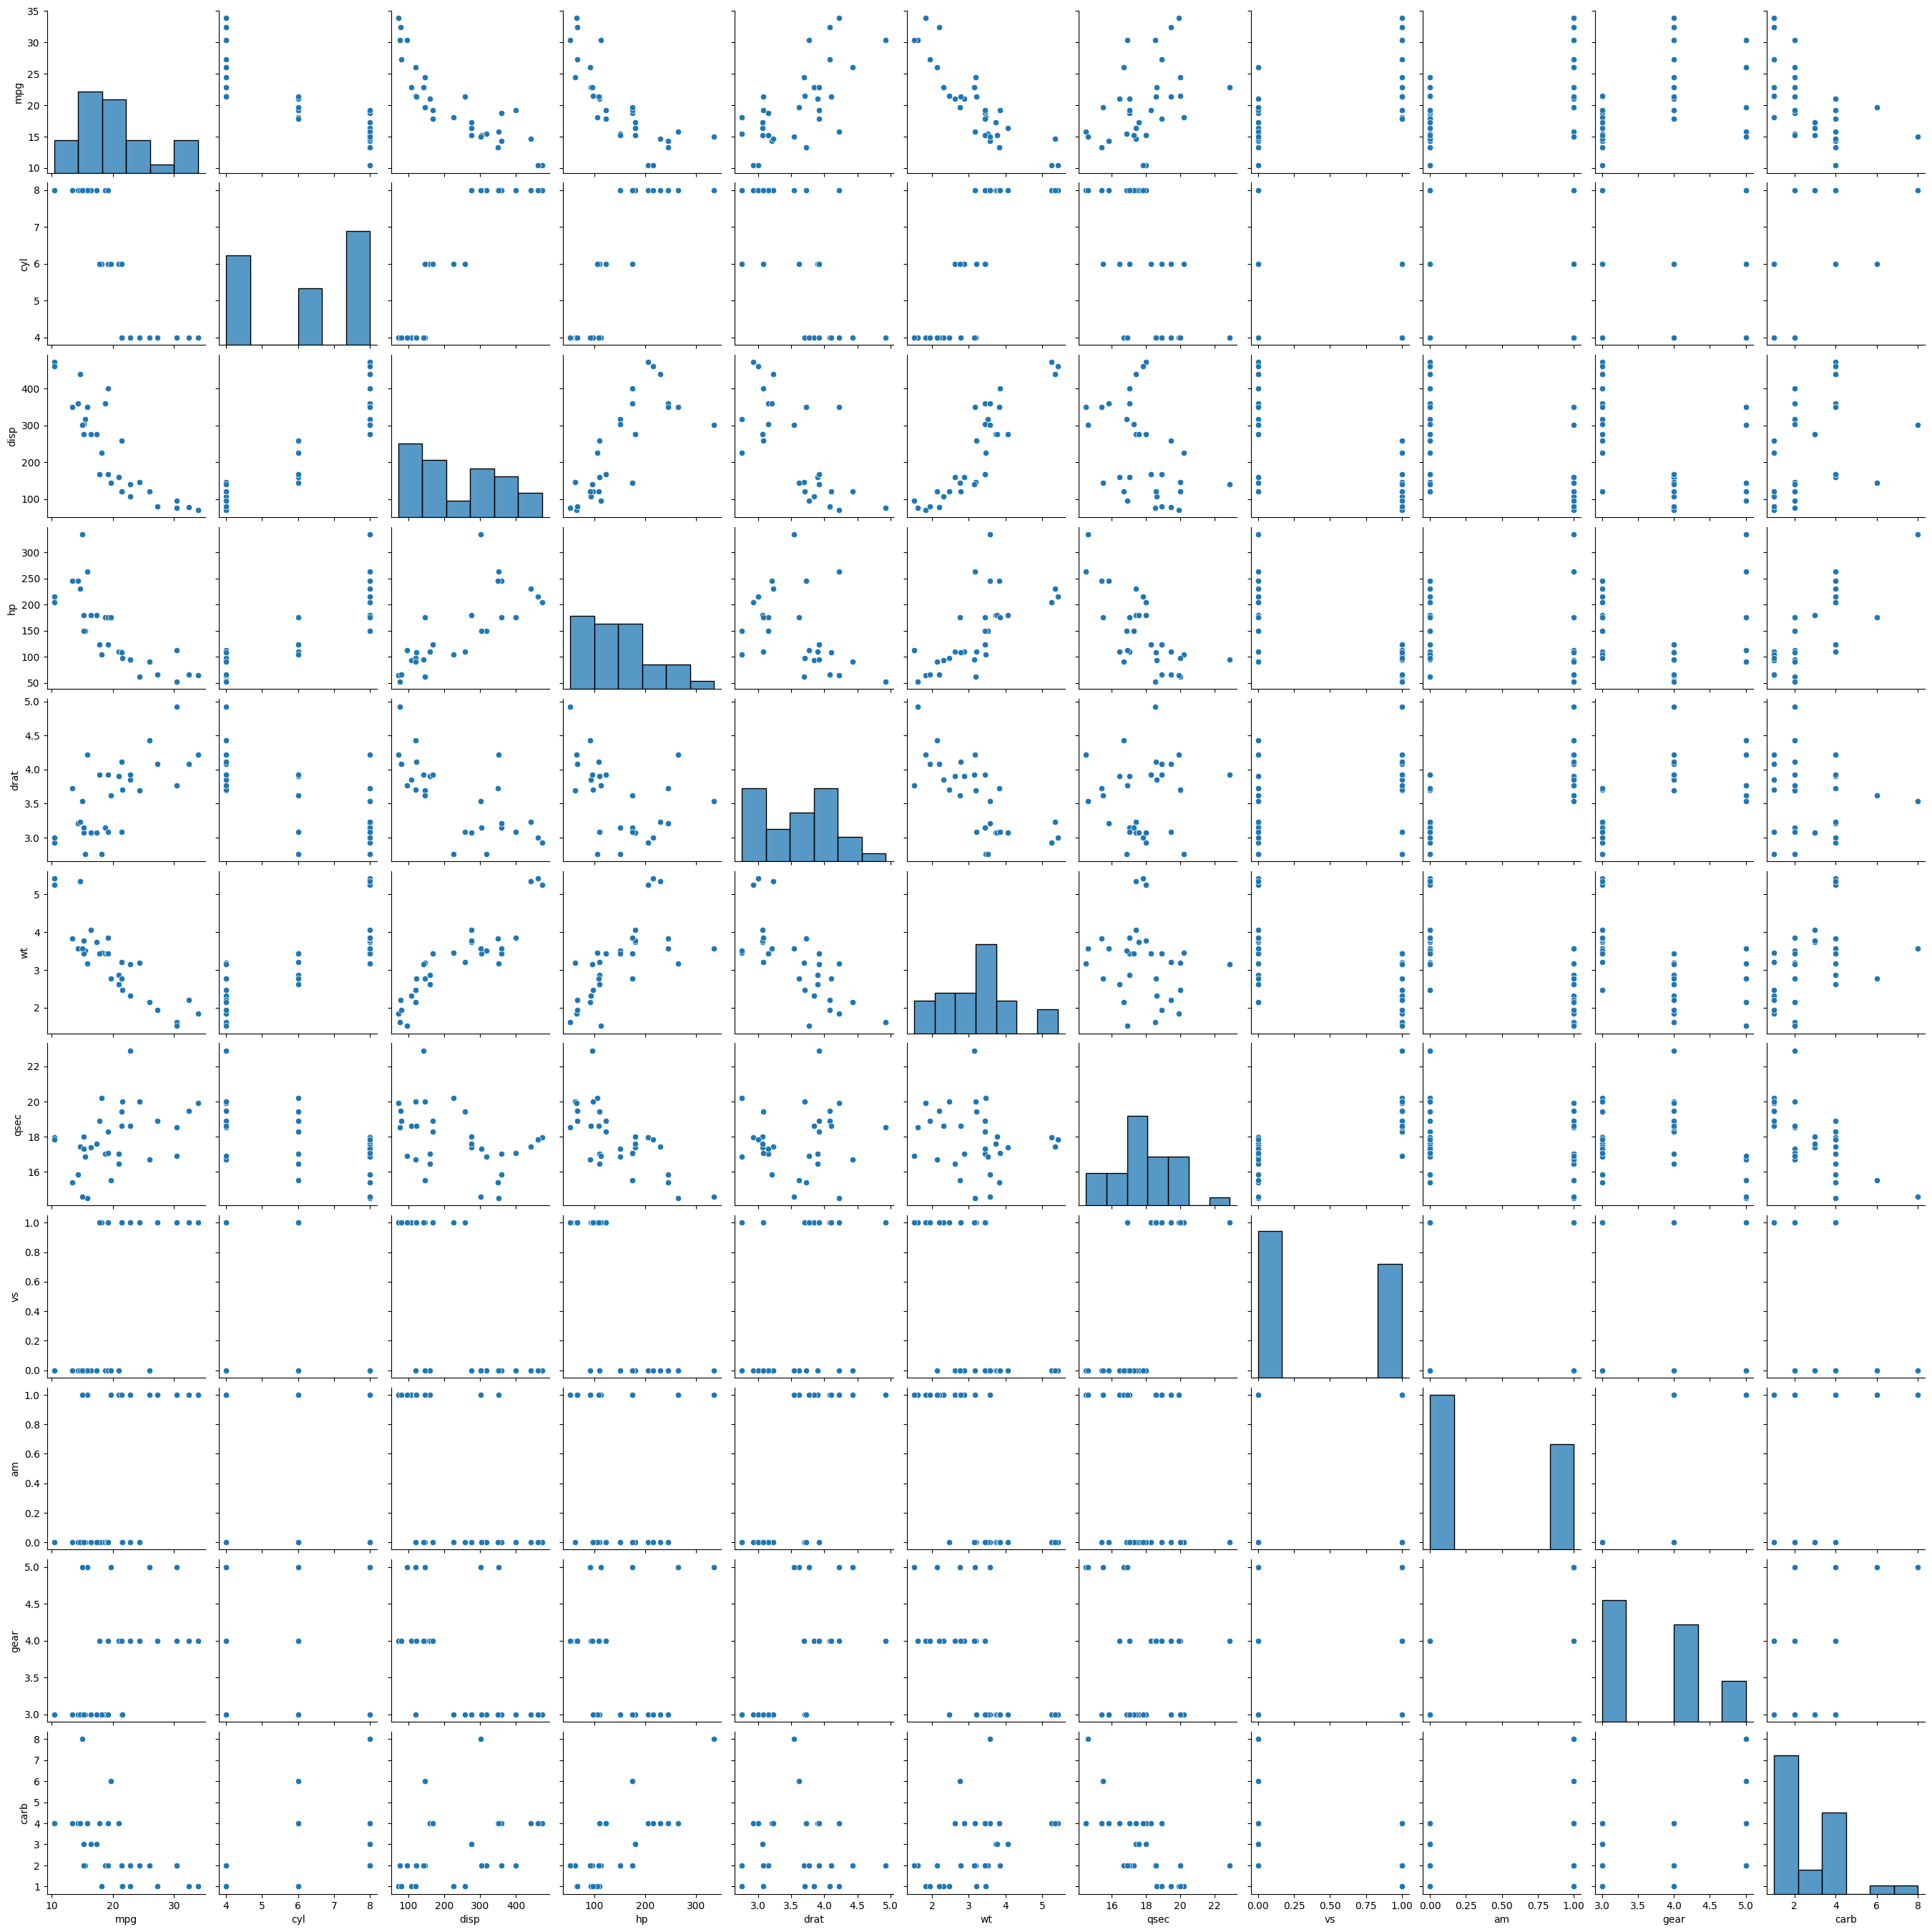

In [170]:
ans.pairplot(data=df)

In [171]:
import seaborn as sns

<Axes: xlabel='gear', ylabel='cyl'>

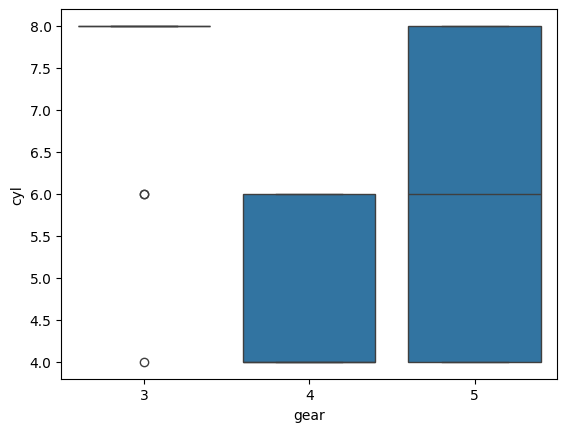

In [174]:
sns.boxplot(x='gear',y='cyl',data=df)

<Axes: xlabel='gear', ylabel='mpg'>

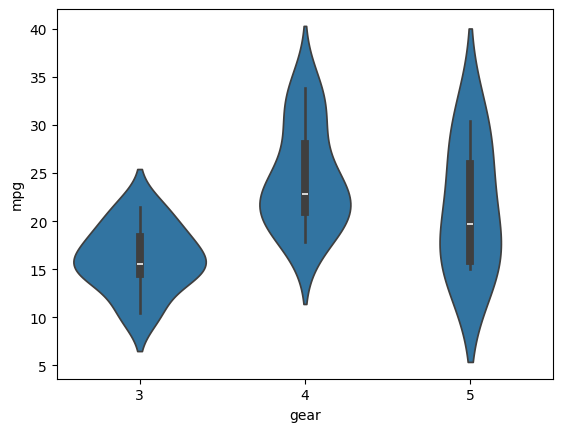

In [175]:
sns.violinplot(x='gear',y='mpg',data=df)

<Axes: xlabel='mpg', ylabel='wt'>

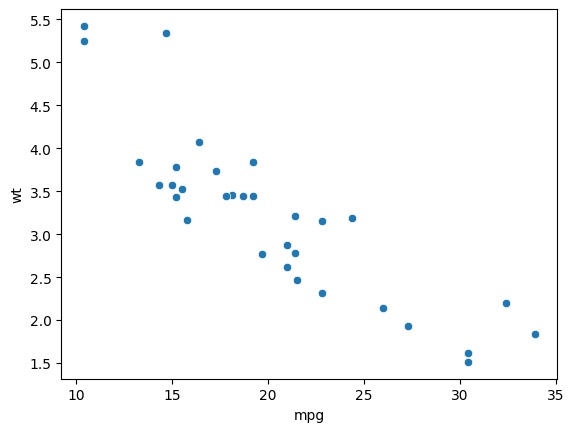

In [180]:
sns.scatterplot(x='mpg',y='wt',data=df)

In [179]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

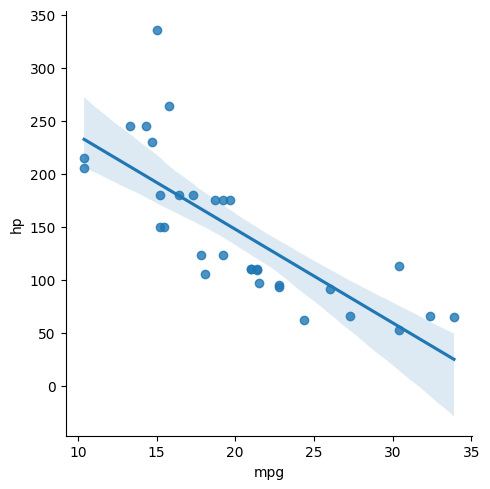

In [181]:
sns.lmplot(x='mpg',y='hp',data=df)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
df=pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [2]:
vv=df['variety'].value_counts().sort_values()

In [3]:
vv

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [4]:
vv=df['variety'].value_counts(normalize=True)
vv

variety
Setosa        0.333333
Versicolor    0.333333
Virginica     0.333333
Name: proportion, dtype: float64

In [5]:
bins=[2,4,6,8]
df['group']=pd.cut(df['petal.length'],bins=bins)

In [7]:
c=df['group'].value_counts()

In [9]:
c=df['sepal.length'].value_counts().sort_index().cumsum()

In [10]:
c

sepal.length
4.3      1
4.4      4
4.5      5
4.6      9
4.7     11
4.8     16
4.9     22
5.0     32
5.1     41
5.2     45
5.3     46
5.4     52
5.5     59
5.6     65
5.7     73
5.8     80
5.9     83
6.0     89
6.1     95
6.2     99
6.3    108
6.4    115
6.5    120
6.6    122
6.7    130
6.8    133
6.9    137
7.0    138
7.1    139
7.2    142
7.3    143
7.4    144
7.6    145
7.7    149
7.9    150
Name: count, dtype: int64

In [11]:
nd=df.select_dtypes(include=[np.number])

In [15]:
stat={
    ' mean':nd.mean(),
    'mode':nd.mode(),
'median':nd.median(),
'sd':nd.std(), 
'var':nd.var()
}

In [16]:
stat

{' mean': sepal.length    5.843333
 sepal.width     3.057333
 petal.length    3.758000
 petal.width     1.199333
 dtype: float64,
 'mode':    sepal.length  sepal.width  petal.length  petal.width
 0           5.0          3.0           1.4          0.2
 1           NaN          NaN           1.5          NaN,
 'median': sepal.length    5.80
 sepal.width     3.00
 petal.length    4.35
 petal.width     1.30
 dtype: float64,
 'sd': sepal.length    0.828066
 sepal.width     0.435866
 petal.length    1.765298
 petal.width     0.762238
 dtype: float64,
 'var': sepal.length    0.685694
 sepal.width     0.189979
 petal.length    3.116278
 petal.width     0.581006
 dtype: float64}

In [17]:
ow=pd.crosstab(df['variety'],columns='count')
ow

col_0,count
variety,
Setosa,50
Versicolor,50
Virginica,50


In [18]:
tw=pd.crosstab(df['variety'],columns=df['sepal.length'])

In [19]:
tw

sepal.length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
variety,,,,,,,,,,,,,,,,,,,,,
Setosa,1,3,1,4,2,5,4,8,8,3,...,0,0,0,0,0,0,0,0,0,0
Versicolor,0,0,0,0,0,0,1,2,1,1,...,1,1,1,0,0,0,0,0,0,0
Virginica,0,0,0,0,0,0,1,0,0,0,...,2,3,0,1,3,1,1,1,4,1


In [20]:
tw=pd.crosstab(df['variety'],columns=df['sepal.length'],normalize='index')

In [21]:
tw

sepal.length,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,...,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.6,7.7,7.9
variety,,,,,,,,,,,,,,,,,,,,,
Setosa,0.02,0.06,0.02,0.08,0.04,0.1,0.08,0.16,0.16,0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Versicolor,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.04,0.02,0.02,...,0.02,0.02,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Virginica,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.00,0.00,0.00,...,0.04,0.06,0.00,0.02,0.06,0.02,0.02,0.02,0.08,0.02


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
mean,sig=70,10
hei=np.random.normal(mean,sig,100)

<Axes: ylabel='Count'>

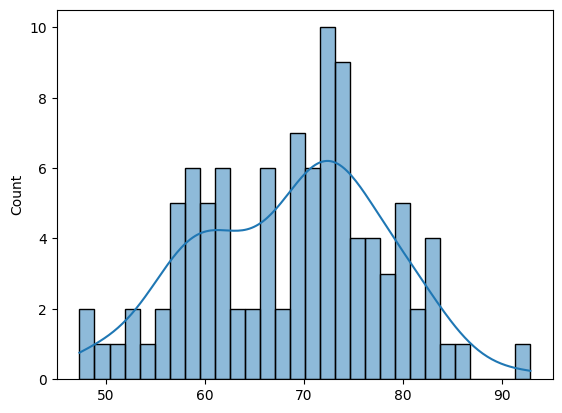

In [8]:
import scipy.stats as sts 
sns.histplot(hei,bins=30,kde=True)

In [9]:
mufit,sd=sts.norm.fit(hei)

In [10]:
x=np.linspace(min(hei),max(hei),100)
pdff=sts.norm.pdf(x,mufit,sd)

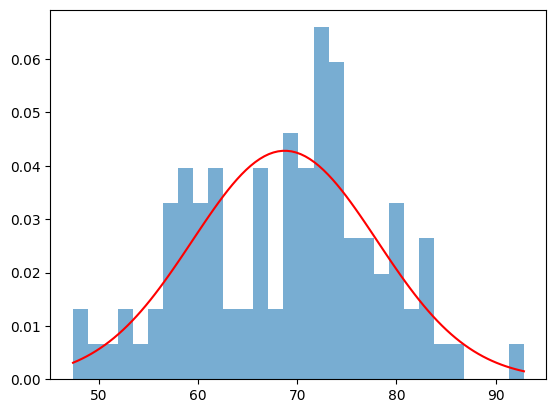

In [19]:
plt.hist(hei,bins=30,label='fr',alpha=0.6,density=True)
plt.plot(x,pdff,'-r',label='fr')

In [16]:
height_samples=hei

C:\Users\karthik cse\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


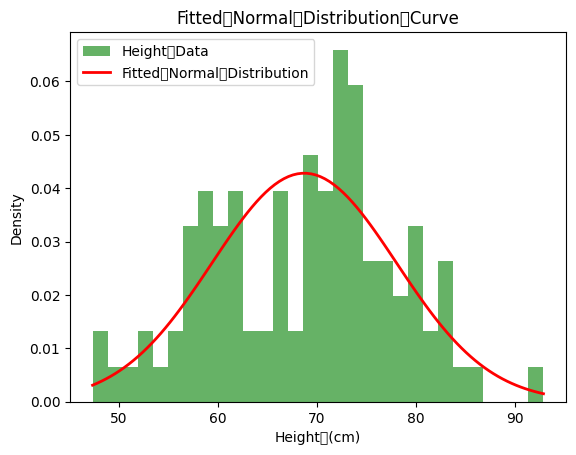

In [17]:
 import	scipy.stats	as	stats
 #	Fit	a	normal	distribution	to	the	data
 mu_fitted,	sigma_fitted	=	stats.norm.fit(height_samples)
 #	Generate	x	values	for	the	normal	distribution	curve
 x	=	np.linspace(min(height_samples),	max(height_samples),	100)
 #	Generate	the	PDF	(Probability	Density	Function)	for	the	fitted	normal	distribution
 pdf_fitted	=	stats.norm.pdf(x,	mu_fitted,	sigma_fitted)
 #	Plot	the	histogram	and	the	fitted	normal	distribution	curve
 plt.hist(height_samples,	bins=30,	density=True,	alpha=0.6,	color='g',	label='Height	Data')
 plt.plot(x,	pdf_fitted,	'r-',	label='Fitted	Normal	Distribution',	linewidth=2)
 plt.title('Fitted	Normal	Distribution	Curve')
 plt.xlabel('Height	(cm)')
 plt.ylabel('Density')
 plt.legend()
 plt.show()

In [21]:
from scipy.stats import shapiro,kstest

In [23]:
stat,pval=shapiro(hei)
stat1,pval1=kstest(hei,'norm',args=(mufit,sig))
stat,pval,stat1,pval1

(0.9847829937934875,
 0.3063199818134308,
 0.0724891022836403,
 0.6426421555711561)